In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df_scaled = df.copy()

from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis ='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
scaled_X.shape

scaled_x_copy = scaled_X[:10]
scaled_x_copy

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ]])

In [17]:
def minibatch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    b = 0
    
    total_sample = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    j = 0
    
    for i in range(epochs):
        
        if j+4 < total_sample: 
            j = 0
            
        sample_X = X[j:3]
        sample_y = y_true[j:3] 
        
        j+= 3
        
        y_predicted = np.dot(w, sample_X.T)+ b #w1*area +w2*bedrooms
        
        w_grad = -(2/total_sample)*(sample_X.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_sample)*np.sum(sample_y-y_predicted)
        
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%50 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = minibatch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 5000)      
w, b, cost    

(array([0.69982519, 0.65673623]), -0.24164224615871727, 0.002036495735972643)

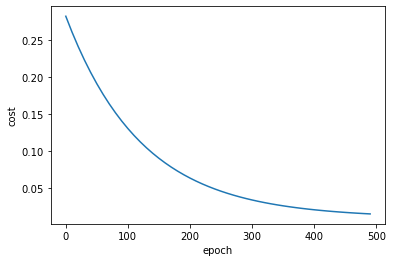

In [7]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [8]:
def prediction_fn(area, bedroom,w,b):
    scaled_X = sx.transform([[area, bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]* scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]
    
prediction_fn(2600,4,w,b)

144.18214236868127

In [9]:
prediction_fn(1000,2,w,b)

25.625525585245533

In [10]:
prediction_fn(1500,3,w,b)

72.86887032002429

In [11]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    b = 0
    
    total_sample = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_sample-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T)+b
        
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_sample)*np.sum(sample_y-y_predicted)
        
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)      
w, b, cost    

w_sgd, b_sgd, cost_sgd

(array([0.7068279 , 0.67906796]), -0.23062566172461302, 0.0011507467648571752)

In [12]:
w,b,cost

(array([0.86176283, 0.80548361]), -0.30802115179699346, 0.01433884472232151)

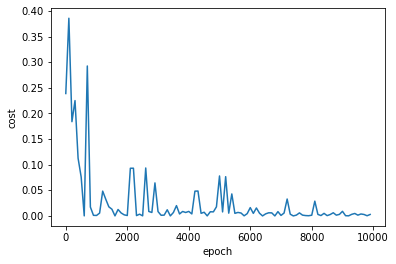

In [13]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [14]:
prediction_fn(2600,4,w_sgd,b_sgd)

128.84847044868965

In [18]:
for i in range(0,9,3):
    print(i)

0
3
6
